In [1]:
### Author: Felix Martinez

# Importing our Packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

## Defining each equation 
We will begin by defining each equation as they are written in David Hogg's paper: **Distance measures in cosmology** [(found here)](https://arxiv.org/pdf/astro-ph/9905116.pdf). With these defined functions, we will plot the final graphs at the end of the paper (Figures 1-7).

### Hubbles Constant:
The **Hubble constant**, $H_0$ can be defined by:

$$
v = H_0d
$$

Where $v$ is the recession speed, and $d$ is the distance in the expanding universe.  The dimensions of $h_0$ are inverse time but can be written as:

$$
H_0 = 100 h\ \text{km}\ \text{s}^{-1}\ \text{Mpc}^{-1}
$$

Where $h$ is a dimensionless number found between $(0.6 < h < 0.9)$. Further, the speed of light $c$ can be used to find the **Hubble Distance**, found to be:

$$
D_H \equiv \frac{c}{H_0} = 3000 h^{-1} \text{Mpc} = 9.26 \times 10^{25} h^{-1} \text{m}
$$

### Our Dimensionless parameters:

Each equation will have 4 variables, $\Omega_M$, $\Omega_k$, $\Omega_\Lambda$, and $z$. $\Omega_M$, $\Omega_k$, $\Omega_\Lambda$ are dimensionless density parameters defined by:

$$
\Omega_M \equiv \frac{8\pi G \rho_0}{3H^2_0}
$$

$$
\Omega_\Lambda \equiv \frac{\Lambda c^2}{3H^2_0}
$$

$$
\Omega_M + \Omega_\Lambda + \Omega_k = 1
$$

Where $\rho$ is the mass density of the universe, and $\Lambda$ is a cosmological constant. The three used throughout this example are defined as:


| name| $\Omega_M$  | $\Omega_\Lambda$    | $\Omega_k$    | 
|:---|-------------:|-----------:| -----------:|
| Einstein-de-Sitter |  1  | 0       | 0 |
| Low Density | 0.05  | 0    | 0.95 |
| High Lambda | 0.2  | 0.8    | 0|
|  | empty  | empty    | empty|

Where our third density parameter $\Omega_k$, measures the curvature of our universe.

In [2]:
# first we must define our global constant (choosing 1 for convenience)
D_H = 1

### Angular Size Distance
First we must define the **angular size distance** (not to be confused with the angular diameter distance, $D_A$ defined further below).

$$
E_z = \sqrt{\Omega_M(1+z)^3 + \Omega_k(1+z)^2 + \Omega_\Lambda}
$$

Which is proportional to the timer derivation of the loagarithm of the scale factor $(\dot a(t)/a(t))$ with $z$ redshift and $\Omega_M, \Omega_k, \Omega_\Lambda$, the three density parameters defined above.

In [3]:
def E_z(Om, Ok, Ol, z):
    
    return np.sqrt(Om * (1+z)**3 + Ok * (1+z)**2 + Ol)

### Total line-of-sight Comoving Distance
The **total line-of-sight comoving distance** is the integration of this equation from redshift $z' = 0 \rightarrow z'=z$
$$
D_C = D_H \int_0^z \frac{dz'}{E(z')}
$$

In [4]:
def D_C(Om, Ok, Ol, z):
    z_range = np.arange(0.000001, z + 0.001, 0.001)
    return (D_H * np.trapz(1 / E_z(Om, Ok, Ol, z_range), z_range))

### Comoving Distance
$D_M$  is the **comoving distance** between two events at the same redshift.

$$
D_M = 
\begin{cases}
    D_H \frac{1}{\sqrt{\Omega_k}}\sinh[\sqrt{\Omega_k}D_c/D_H], & \text{for } \Omega_k > 0\\
    D_C, & \text{for } \Omega_k = 0\\
    D_H \frac{1}{\sqrt{|\Omega_k|}}\sinh[\sqrt{|\Omega_k|}D_c/D_H], & \text{for }  \Omega_k < 0\\
\end{cases}
$$

For $\Omega_\Lambda = 0$, there is an analytic solution to the above eqations.

$$
D_M = D_H \frac{2[2-\Omega_M(1-z) - (2-\Omega_M)\sqrt{1+\Omega_Mz}]}{\Omega_M^2(1+z)}, \ \text{for} \ \Omega_\Lambda = 0
$$

We will be defining this equation as the plots we will be recreating have $\Omega_\Lambda = 0$ 

In [5]:
def D_M(Om, Ok, Ol, z, array=True):
    
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
    
        if Ol == 0:
            top = 2 * (2 - Om * (1-z_range) - (2 - Om) * np.sqrt(1 + Om * z_range))
            bottom = (Om **2) * (1 + z_range)
            return (D_H * top/bottom)
    
        elif Ok == 0:
            result = []
            for i in z_range:
                 result.append(D_C(Om, Ok, Ol, i))
            return np.array(result)
    
        elif Ok > 0:
            result = []
            for i in z_range:
                sinh = np.sinh(np.sqrt(Ok) * D_C(Om, Ok, Ol, i)/D_H)
                result.append(D_H * 1/np.sqrt(Ok) * sinh)
            return np.array(result)

        elif Ok < 0:
            result = []
            for i in z_range:
                sinh = np.sinh(np.sqrt(np.abs(Ok)) * D_C(Om, Ok, Ol, i)/D_H)
                result.append(D_H * 1/np.sqrt(np.abs(Ok)) * sinh)
            return np.array(result)
    
    if array == False:
        
        if Ol == 0:
            top = 2 * (2 - Om * (1-z) - (2 - Om) * np.sqrt(1 + Om * z))
            bottom = (Om **2) * (1 + z)
        
            return D_H * (top/bottom)
    
        elif Ok == 0:
            result = []
            for i in z:
                result.append(D_C(Om, Ok, Ol, i))
            return result
    
        elif Ok > 0:
            result = []
            for i in z:
                result.append(1/np.sqrt(Ok) * np.sinh(np.sqrt(Ok) * D_C(Om, Ok, Ol, i)))
            return result

        elif Ok < 0:
            result = []
            for i in z:
                result.append(1/np.sqrt(np.abs(Ok)) * np.sinh(np.sqrt(np.abs(Ok)) * D_C(Om, Ok, Ol, i)))
            return result

In [6]:
# Testing the function
Dm1 = D_M(1, 0, 0, 5)
Dm2 = D_M(.05, .95, 0, 5)
Dm3 = D_M(0.2, 0, .8, 5)

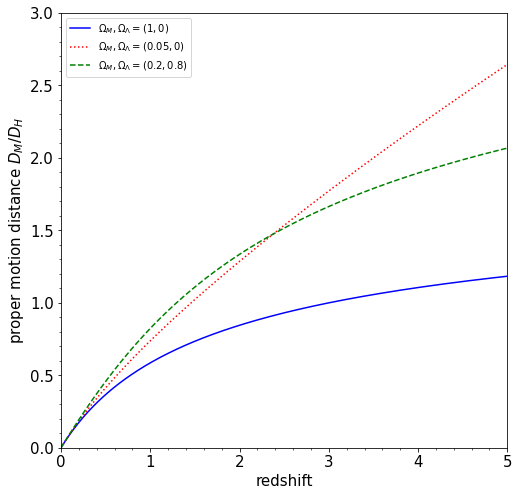

In [7]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, Dm1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, Dm2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, Dm3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.xlim(0,5)
plt.ylim(0,3)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('proper motion distance $D_M/D_H$', fontsize = 15)
plt.legend()

#plt.savefig('proper motion distance.png')
plt.show()

### Angular Diameter Distance
$D_A$ is the **angular diameter distance** which is defined as the ratio of an object's physical transverse size to its angular size.

$$
D_A = \frac{D_M}{1+z}
$$

There is also an angular diameter distance $D_{A12}$ between **2 objects** at redshift $z_1$ and $z_2$. This is often applied in gravitational lensing. (This formula is only applicable for $\Omega_k \ge 0$).

$$
D_{A12} = \frac{1}{1+z_2}\Big[D_{M2}\sqrt{1 + \Omega_k \frac{D^2_{M1}}{D^2_H}} - D_{M1}\sqrt{1 + \Omega_k \frac{D^2_{M2}}{D^2_H}}  \Big]
$$

In [8]:
def D_A(Om, Ok, Ol, z, array=True):
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        
        return (D_M(Om, Ok, Ol, z_range, array=False) / (1+z_range))
    
    if array == False:
        return (D_M(Om, Ok, Ol, z, array=False) / (1+z))

In [9]:
# Testing the function
Da1 = D_A(1, 0, 0, 5)
Da2 = D_A(.05, .95, 0, 5)
Da3 = D_A(.2, 0, .8, 5)

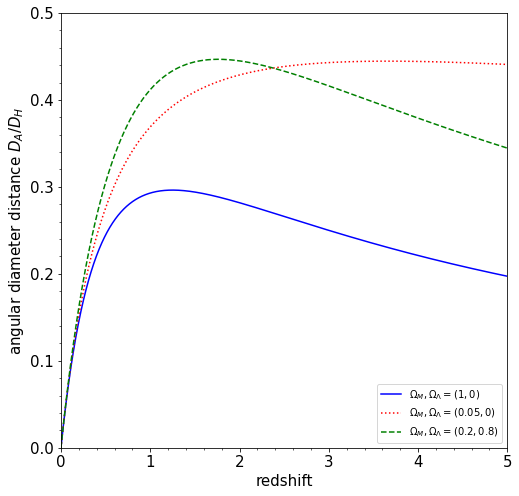

In [10]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, Da1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, Da2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, Da3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.xlim(0,5)
plt.ylim(0,0.5)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('angular diameter distance $D_A / D_H$', fontsize = 15)
plt.legend()

#plt.savefig('angular diameter distance.png')
plt.show()

### Luminosity Distance
$D_L$ Is the **luminosity distance** which is defined by the relationship between bolometric flux $S$ and bolometric luminosity $L$

$$
D_L \equiv \sqrt{\frac{L}{4\pi S}}
$$

This is related to the transverse comoving distance and angular diameter distance by the realationship:

$$
D_L = (1+z)D_M = (1+z)^2D_A
$$

In [11]:
def D_L(Om, Ok, Ol, z, array=True):
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        return (1 + z_range)**2 * D_A(Om, Ok, Ol, z_range, array=False)
    
    if array == False:
        return (1 + z)**2 * D_A(Om, Ok, Ol, z, array=False)

In [12]:
# Testing the function
Dl1 = D_L(1, 0, 0, 5)
Dl2 = D_L(.05, .95, 0, 5)
Dl3 = D_L(.2, 0, 0.8, 5)

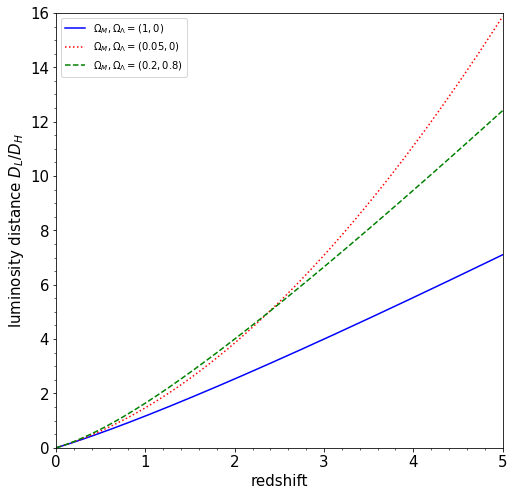

In [13]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, Dl1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, Dl2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, Dl3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.xlim(0,5)
plt.ylim(0,16)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift',fontsize = 15)
plt.ylabel('luminosity distance $D_L/D_H$', fontsize = 15)
plt.legend()

#plt.savefig('luminosity distance.png')
plt.show()

### Distance Modulus
$DM$ is the **distance modulus** defined by:

$$
DM \equiv 5 \log\Big(\frac{D_L}{10 \text{ pc}}\Big)
$$

The distance modulus is a measure of distance to an object.

In [14]:
def DMM(Om, Ok, Ol, z, array=True):
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        return 5 * np.log10(D_L(Om, Ok, Ol, z_range, array=False) * 1e6 /10) + 5 * np.log10(.9)
    
    if array == False:
        return 5 * np.log10(D_L(Om, Ok, Ol, z) * 1E6 / 10) + 5 * np.log10(0.9)

In [15]:
# Testing the function
Dmm1 = DMM(1, 0, 0, 5)
Dmm2 = DMM(.05, .95, 0, 5)
Dmm3 = DMM(.2, 0, .8, 5)

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [30]:
Dmm4 = DMM(0.3, 0, 0.7, 5)
Dmm5 = DMM(1, 0, 1, 5)
Dmm6 = DMM(0.3, 0.7, 0, 5)

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


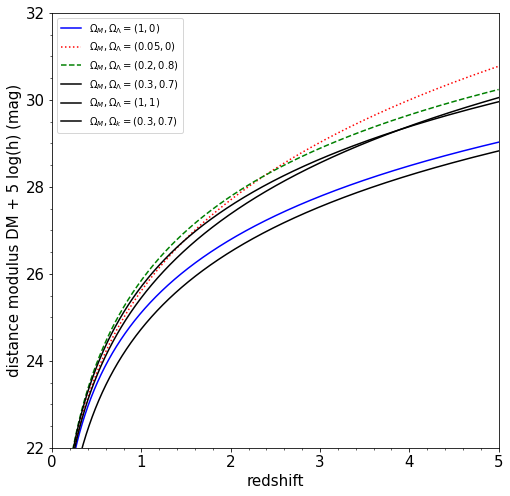

In [32]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, Dmm1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, Dmm2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, Dmm3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.plot(redshift, Dmm4, 'black', label = '$\Omega_M,\Omega_\Lambda = (0.3,0.7)$')
plt.plot(redshift, Dmm5, 'black', label = '$\Omega_M,\Omega_\Lambda = (1,1)$')
plt.plot(redshift, Dmm6, 'black', label = '$\Omega_M,\Omega_k = (0.3,0.7)$')
plt.xlim(0,5)
plt.ylim(22,32)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('distance modulus DM + 5 log(h) (mag)', fontsize = 15)
plt.legend()

#plt.savefig('distance modulus.png')
plt.show()

### Comoving Volume
$V_C$ is the **Comoving volume**, or the volume measure in which number densities of non-evolving objects locked into Hubble flow are constant with Redshift. It is the proper volume times 3 factors of the relative scale factor now to then, or $(1 + z)^3$. The comoving volume element in solid angle $d\Omega$ and redshift interval $dz$ is:

$$
dV_C = D_H\frac{(1+z)^2D_A^2}{E(z)}d\Omega dz
$$

The total comoving volue, all-sky, out to redshift z is:

$$
V_C = 
\begin{cases}
    \Big(\frac{4\pi D_H^3}{2\Omega_k}\Big)\Big[\frac{D_M}{D_H}\sqrt{1 + \Omega_k\frac{D_M^2}{D_H^2}} - \frac{1}{\sqrt{|\Omega_k|}}\text{arcsinh}(\sqrt{|\Omega_k|}\frac{D_M}{D_H})\Big], & \text{for } \Omega_k > 0\\
    \frac{4\pi}{3}D_M^3, & \text{for } \Omega_k = 0\\
    \Big(\frac{4\pi D_H^3}{2\Omega_k}\Big)\Big[\frac{D_M}{D_H}\sqrt{1 + \Omega_k\frac{D_M^2}{D_H^2}} - \frac{1}{\sqrt{|\Omega_k|}}\arcsin(\sqrt{|\Omega_k|}\frac{D_M}{D_H})\Big],& \text{for }  \Omega_k < 0\\
\end{cases}
$$

Where $D_H^3$ is sometimes called the **Hubble volume**.

In [18]:
def dVc(Om, Ok, Ol, z, array=True):
    dU, dz = 1, 1
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        top = (((1 + z_range)**2) * D_A(Om, Ok, Ol, z_range, array=False)**2)
        bot = E_z(Om, Ok, Ol, z_range) * dU * dz
        return D_H * top / bot
    
    if array == False:
        top = (((1 + z)**2) * D_A(Om, Ok, Ol, z, array=False)**2)
        bot = E_z(Om, Ok, Ol, z) * dU * dz
        return D_H * top / bot

In [19]:
# Testing the function
DVc1 = dVc(1, 0, 0, 5)
DVc2 = dVc(.05, .95, 0, 5)
DVc3 = dVc(.2, 0, .8, 5)

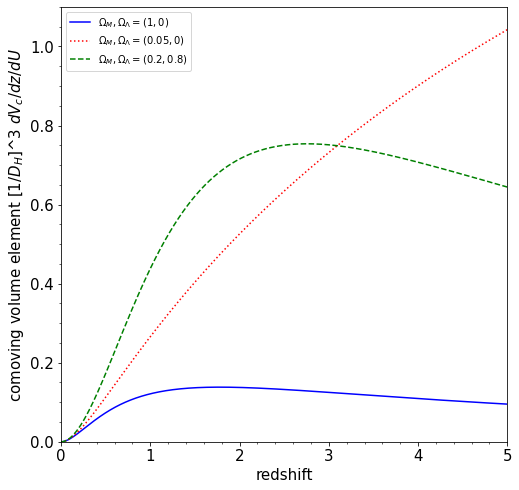

In [20]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, DVc1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, DVc2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, DVc3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.xlim(0,5)
plt.ylim(0,1.1)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('comoving volume element [1/$D_H$]^3 $dV_c$/$dz$/$dU$', fontsize = 15)
plt.legend()

#plt.savefig('comoving volume element.png')
plt.show()

### Lookback Time
The **lookback time**, defined as $t_L$ to an object is the diference between the age of the Universe now ($t_o$) and the age of the universe at the time the photons were emitted ($t_e$).

$$
t_L = t_H\int_0^z\frac{dz'}{(1+z')E(z')}
$$

It is used to predict properties of high-redshift objects with evolutionary models, such as passive stellar evolution for galaxies.

In [21]:
def t_l(Om, Ok, Ol, z, array=True):
    t_H = 1
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        integral = []
        for i in z_range:
            redshift = np.arange(0.000001, i + 0.001, 0.001)
            bot = ((1 + redshift) * E_z(Om, Ok, Ol, redshift))
            integral.append(np.trapz(1 / bot, redshift))
            
        return t_H * integral
    
    if array == False:
        integral = []
        for i in z:
            redshift = np.arange(0.000001, i + 0.001, 0.001)
            bot = ((1 + redshift) * E_z(Om, Ok, Ol, redshift))
            integral.append(np.trapz(1 / bot, redshift))
            
        return t_H * integral

In [22]:
# Testing the function
tl1 = t_l(1, 0, 0, 5)
tl2 = t_l(.05, .95, 0, 5)
tl3 = t_l(.2, 0, .8, 5)

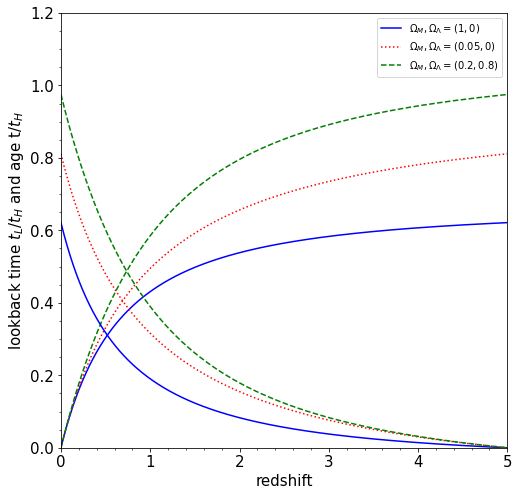

In [23]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, tl1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, tl2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, tl3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')

plt.plot(redshift, max(tl1) - tl1, 'b-')
plt.plot(redshift, max(tl2) - tl2, 'r:')
plt.plot(redshift, max(tl3) - tl3, 'g--')

plt.xlim(0,5)
plt.ylim(0, 1.2)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift',fontsize = 15)
plt.ylabel('lookback time $t_L$/$t_H$ and age t/$t_H$', fontsize = 15)
plt.legend()

#plt.savefig('lookback time and age graph.png')
plt.show()

### Probability of Intersecting Objects
The **Probability of intersecting objects** comes from the question: What is the incremental probability $dP$ that a line of sight will intersect one of the objects in redshift interval $dz$ at redshift $z$?

$$
dP = n(z)\sigma(z)D_H\frac{(1+z)^2}{E(z)}dz
$$

In [24]:
def dP(Om, Ok, Ol, z, array=True):
    n_z, o_z, dz = 1, 1, 1
    if array == True:
        z_range = np.arange(0.000001, z + 0.001, 0.001)
        return n_z * o_z * D_H * ((1 + z_range)**2) / E_z(Om, Ok, Ol, z_range) * dz

    if array == False:
        return n_z * o_z * D_H * ((1 + z)**2) / E_z(Om, Ok, Ol, z) * dz

In [25]:
# Testing the function
Dp1 = dP(1, 0, 0, 5)
Dp2 = dP(.05, .95, 0, 5)
Dp3 = dP(.2, 0, .8, 5)

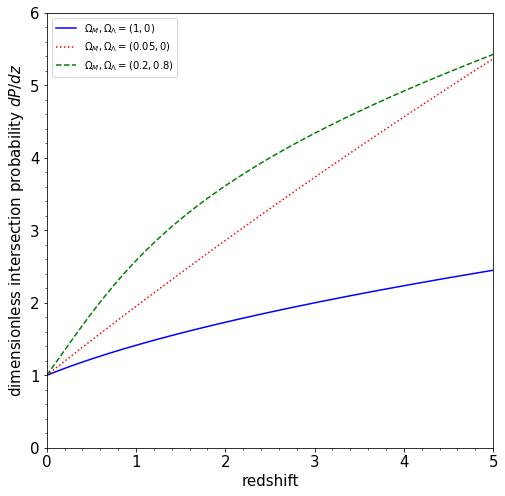

In [26]:
redshift = np.arange(0, 5 + 0.001, 0.001)

plt.figure(figsize = [8,8])
plt.plot(redshift, Dp1, 'b-', label = '$\Omega_M,\Omega_\Lambda = (1,0)$')
plt.plot(redshift, Dp2, 'r:', label = '$\Omega_M,\Omega_\Lambda = (0.05,0)$')
plt.plot(redshift, Dp3, 'g--', label = '$\Omega_M,\Omega_\Lambda = (0.2,0.8)$')
plt.xlim(0,5)
plt.ylim(0, 6)
plt.minorticks_on()
plt.tick_params(axis='both', which='major',labelsize=15)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('dimensionless intersection probability $dP/dz$', fontsize = 15)
plt.legend()

#plt.savefig('dimensionless intersection probability graph.png')
plt.show()